In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Dataset

In [ ]:
!mkdir training_data_64
!mkdir training_data_64/cheetah
!mkdir training_data_64/jaguar
!mkdir training_data_64/tiger

In [ ]:
!mkdir augmented_14400
!mkdir augmented_14400/cheetah
!mkdir augmented_14400/jaguar
!mkdir augmented_14400/tiger

In [ ]:
!unrar e "/content/drive/MyDrive/2020 2021 2 _ Fernanda Januar Pratama/Coding/Dataset/training_data_64/cheetah.rar" "/content/training_data_64/cheetah"
!unrar e "/content/drive/MyDrive/2020 2021 2 _ Fernanda Januar Pratama/Coding/Dataset/training_data_64/jaguar.rar" "/content/training_data_64/jaguar"
!unrar e "/content/drive/MyDrive/2020 2021 2 _ Fernanda Januar Pratama/Coding/Dataset/training_data_64/tiger.rar" "/content/training_data_64/tiger"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/2020 2021 2 _ Fernanda Januar Pratama/Coding/Dataset/training_data_64/cheetah.rar

Extracting  /content/training_data_64/cheetah/aug_0_6121912.jpg            0%  OK 
Extracting  /content/training_data_64/cheetah/aug_100_7164689.jpg          1%  OK 
Extracting  /content/training_data_64/cheetah/aug_101_2901784.jpg          1%  OK 
Extracting  /content/training_data_64/cheetah/aug_102_9506627.jpg          2%  OK 
Extracting  /content/training_data_64/cheetah/aug_103_3202380.jpg          2%  OK 
Extracting  /content/training_data_64/cheetah/aug_104_9121367.jpg          3%  OK 
Extracting  /content/training_data_64/cheetah/aug_105_6957174.jpg          3%  OK 
Extracting  /content/training_data_64/cheetah/aug_106_9084765.jpg          4%  OK 
Extracting  /content/training_data_64/cheetah/aug_107_6815822.jpg        

In [ ]:
!unrar e "/content/drive/MyDrive/2020 2021 2 _ Fernanda Januar Pratama/Coding/Dataset/augmented_14400/cheetah.rar" "/content/augmented_14400/cheetah"
!unrar e "/content/drive/MyDrive/2020 2021 2 _ Fernanda Januar Pratama/Coding/Dataset/augmented_14400/jaguar.rar" "/content/augmented_14400/jaguar"
!unrar e "/content/drive/MyDrive/2020 2021 2 _ Fernanda Januar Pratama/Coding/Dataset/augmented_14400/tiger.rar" "/content/augmented_14400/tiger"

Streaming output truncated to the last 5000 lines.
Extracting  /content/augmented_14400/jaguar/aug_392_1116542.jpg           96%  OK 
Extracting  /content/augmented_14400/jaguar/aug_392_1122204.jpg           96%  OK 
Extracting  /content/augmented_14400/jaguar/aug_392_202489.jpg            96%  OK 
Extracting  /content/augmented_14400/jaguar/aug_392_2211650.jpg           96%  OK 
Extracting  /content/augmented_14400/jaguar/aug_392_2392956.jpg           96%  OK 
Extracting  /content/augmented_14400/jaguar/aug_392_269922.jpg            96%  OK 
Extracting  /content/augmented_14400/jaguar/aug_392_2710708.jpg           96%  OK 
Extracting  /content/augmented_14400/jaguar/aug_392_358589.jpg            96%  OK 
Extracting  /content/augmented_14400/jaguar/aug_392_4495676.jpg           96%  OK 
Extracting  /content/augmented_14400/jaguar/aug_392_4834767.jpg           96%  OK 
Extracting  /content/augmente

In [ ]:
import numpy as np
import cv2 as cv
import os
import time
import pandas as pd
import matplotlib.pyplot as plt

from skimage.feature import hog
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import (StratifiedKFold, train_test_split, 
                                     GridSearchCV, cross_val_score)

In [ ]:
def create_dataset(folders):
    dataset = []
    IMG_SIZE = 64
    CATEGORIES = ['cheetah', 'jaguar', 'tiger']
    
    for category in CATEGORIES:
        class_name = CATEGORIES.index(category)
        for file in os.listdir(os.path.join(folders, category)):
            path = os.path.join(folders, category, file)
            image = cv.imread(path, 0)    # grayscale
            
            # CLAHE (Contrast Limited Adaptive Histogram Equalization)
            #clahe = cv.createCLAHE(clipLimit=40.0, tileGridSize=(2,2))
            #clahe_img = clahe.apply(image)
            
            # Median filter + Otsu
            #blur = cv.medianBlur(clahe_img, 3)
            otsu = cv.threshold(image, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[1]
            
            # Canny
            sigma = 0.3
            median = np.median(otsu)
            lower = int(max(0, (1.0 - sigma) * median))
            upper = int(min(255, (1.0 + sigma) * median))
            auto_canny = cv.Canny(otsu, lower, upper)
            
            image= cv.resize(auto_canny, (IMG_SIZE, IMG_SIZE), interpolation = cv.INTER_AREA)
            dataset.append([image, class_name])
            
    return dataset

dataset_ori = create_dataset(r'/content/training_data_64')
print('The number of original images : {}'.format(len(dataset_ori)))

dataset_aug = create_dataset(r'/content/augmented_14400')
print('The number of augmentation images : {}\n'.format(len(dataset_aug)))

# combine dataset with dataset augmentation
image_data = []
label_data = []
for image, label in dataset_ori:
    image_data.append(image)
    label_data.append(label)

for image, label in dataset_aug:
    image_data.append(image)
    label_data.append(label)
    
image_data = np.array(image_data)
#image_array = np.expand_dims(image_array, -1)    # (300, 180, 180) -> (300, 180, 180, 1)
label_data = np.array(label_data)

print('\nType : {}'.format(type(image_data)))
print('The number of the entire image : {}'.format(len(image_data)))
print('The number of the class image : {}'.format(len(label_data)))

The number of original images : 600
The number of augmentation images : 14400


Type : <class 'numpy.ndarray'>
The number of the entire image : 15000
The number of the class image : 15000


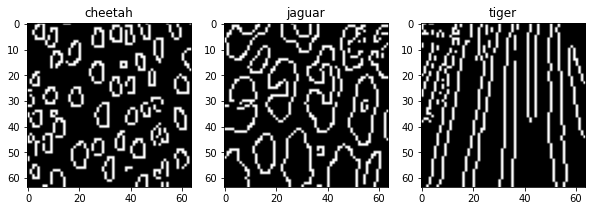

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

ax[0].imshow(image_data[0], cmap='gray'), ax[0].set_title('cheetah')
ax[1].imshow(image_data[200], cmap='gray'), ax[1].set_title('jaguar')
ax[2].imshow(image_data[400], cmap='gray'), ax[2].set_title('tiger')

plt.show()

### Feature Descriptor

In [ ]:
# HOG
def hog_descriptor(images): 
    hog_fd = []
    hog_img = []
    for sample in images:
        fd, img = hog(sample, orientations=9,
                      pixels_per_cell=(8, 8), cells_per_block=(2,2), 
                      visualize=True, multichannel=False, feature_vector=True)

        hog_fd.append(fd)
        hog_img.append(img)

    hog_array = np.array(hog_fd, np.float32)
    vis_array = np.array(hog_img)
    return hog_array, vis_array


In [ ]:
##### feature descriptor using phog level 1
def phog_descriptor(images):
    hog_fd = []
    for sample in images:
        ### Level 0
        hog_vector0,_ = hog_descriptor([sample])
        level_0 = np.array(hog_vector0).ravel()
        
        ### Level 1
        # Cut the image
        cut = images.shape[1] // 2
        left = sample[:, :cut]
        right = sample[:, cut:]

        img1 = left[:cut, :]
        img2 = right[:cut, :]
        img3 = left[cut:, :]
        img4 = right[cut:, :]
        
        # hog
        sub_img = [img1, img2, img3, img4]
        hog_vector1,_ = hog_descriptor(sub_img)    # (4,324)
        level_1 = np.array(hog_vector1).ravel()
        
        ### Concatenate grid_1 and grid_2
        a1 = len(level_0)    # (1764)
        a2 = len(level_1)    # (1296)
        level_0_1 = []
        for i in range(max(a1, a2)):
            if i < a1:
                level_0_1.append(level_0[i])
            if i < a2:
                level_0_1.append(level_1[i])
        
        hog_fd.append(level_0_1)
        
    hog_fd = np.array(hog_fd)
    print(hog_fd.shape)
    return hog_fd


time_start = time.clock()
hog_fd = phog_descriptor(image_data)
time_elapsed = (time.clock() - time_start)

print("Computation time : {:.4f}".format(time_elapsed))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


(15000, 3060)
Computation time : 400.0019


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


### Classification

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


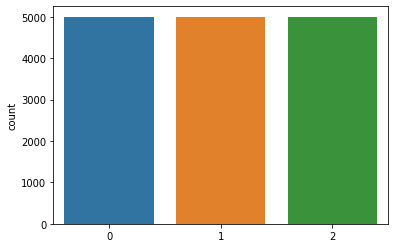

In [ ]:
# Check what is the dataset balance or not?
import seaborn as sns
sns.countplot(label_data)
#plt.xticks(rotation=90)
plt.show()

In [ ]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(hog_fd, label_data, 
                                                    shuffle=True,
                                                    stratify=label_data,
                                                    random_state=0,
                                                    test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(12000, 3060)
(3000, 3060)


In [ ]:
start = time.perf_counter()
pipe = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Validation
cv = StratifiedKFold(n_splits=10)
validation = cross_val_score(pipe, x_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

# Training
#pipe = KNeighborsClassifier()
pipe.fit(x_train, y_train)
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)    # Testing

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

# ROC_AUC
pred_prob_test = pipe.predict_proba(x_test)
roc_auc_test = roc_auc_score(y_test, pred_prob_test, multi_class='ovo')

Elapsed 1827.463 seconds.


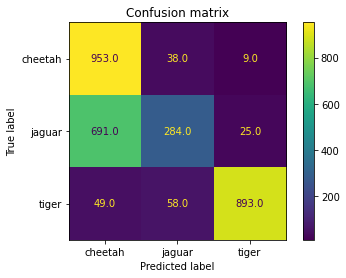

In [ ]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(pipe, x_test, y_test,
                             display_labels=['cheetah', 'jaguar', 'tiger'], 
                             values_format='.1f')

disp.ax_.set_title("Confusion matrix")
plt.show()

In [ ]:
print('Accuracy_Val : {:.4f}\n'.format(validation.mean()))

print('Accuracy_test : {:.4f}'.format(accuracy_score(y_test, y_pred_test)), 
      'Precision_test : {:.4f}'.format(precision_score(y_test, y_pred_test, average='macro')), 
      'Recall_test : {:.4f}'.format(recall_score(y_test, y_pred_test, average='macro')), 
      'F1-Score : {:.4f}'.format(f1_score(y_test, y_pred_test, average='macro')))

# Classification report
from sklearn.metrics import classification_report
target_names = ['cheetah', 'jaguar', 'tiger']
print('\nclassification report testing : \n', classification_report(y_test, y_pred_test, 
                                                                  target_names=target_names))

print("\nAUC-ROC_test : {:.4f}".format(roc_auc_test))
print('Elapsed %.3f seconds.' % elapsed)

Accuracy_Val : 0.7000

Accuracy_test : 0.7100 Precision_test : 0.7579 Recall_test : 0.7100 F1-Score : 0.6821

classification report testing : 
               precision    recall  f1-score   support

     cheetah       0.56      0.95      0.71      1000
      jaguar       0.75      0.28      0.41      1000
       tiger       0.96      0.89      0.93      1000

    accuracy                           0.71      3000
   macro avg       0.76      0.71      0.68      3000
weighted avg       0.76      0.71      0.68      3000


AUC-ROC_test : 0.8932
Elapsed 1827.463 seconds.


In [ ]:
### Calculate performance testing manually
def performances_testing(y_test, y_pred):
    # True Positive
    TP_cheetah = np.sum((y_pred==0) & (y_test==0))
    TP_jaguar = np.sum((y_pred==1) & (y_test==1))
    TP_tiger = np.sum((y_pred==2) & (y_test==2))

    # False Positive
    FP_cheetah = np.sum(((y_pred==0) & (y_test==1))) + np.sum(((y_pred==0) & (y_test==2)))
    FP_jaguar = np.sum(((y_pred==1) & (y_test==0))) + np.sum(((y_pred==1) & (y_test==2)))
    FP_tiger = np.sum(((y_pred==2) & (y_test==0))) + np.sum(((y_pred==2) & (y_test==1)))

    # False Negative
    FN_cheetah = np.sum(((y_pred==1) & (y_test==0))) + np.sum(((y_pred==2) & (y_test==0)))
    FN_jaguar = np.sum(((y_pred==0) & (y_test==1))) + np.sum(((y_pred==2) & (y_test==1)))
    FN_tiger = np.sum(((y_pred==0) & (y_test==2))) + np.sum(((y_pred==1) & (y_test==2)))

    # True Negative
    TN_cheetah = y_test.shape[0] - (TP_cheetah+FP_cheetah+FN_cheetah)
    TN_jaguar = y_test.shape[0] - (TP_jaguar+FP_jaguar+FN_jaguar)
    TN_tiger = y_test.shape[0] - (TP_tiger+FP_tiger+FN_tiger)

    #---------------------------------------------------------------------------#

    ## Precision (MACRO)
    precision_cheetah = TP_cheetah / (TP_cheetah + FP_cheetah)
    precision_jaguar = TP_jaguar / (TP_jaguar + FP_jaguar)
    precision_tiger = TP_tiger / (TP_tiger + FP_tiger)
    precision = (precision_cheetah + precision_jaguar + precision_tiger) / 3

    ## Sensitivity/Recall/TPR (MACRO)
    recall_cheetah = TP_cheetah / (TP_cheetah + FN_cheetah)
    recall_jaguar = TP_jaguar / (TP_jaguar + FN_jaguar)
    recall_tiger = TP_tiger / (TP_tiger + FN_tiger)
    recall = (recall_cheetah + recall_jaguar + recall_tiger) / 3

    ## Specificity/TNR (MACRO)
    TNR_cheetah = TN_cheetah / (TN_cheetah + FP_cheetah)
    TNR_jaguar = TN_jaguar / (TN_jaguar + FP_jaguar)
    TNR_tiger = TN_tiger / (TN_tiger + FP_tiger)
    TNR = (TNR_cheetah + TNR_jaguar + TNR_tiger) / 3

    ## F1-Score (MACRO)
    F1 = 2 * ((precision * recall) / (precision + recall))

    # Negative Predictive Value (NPV)
    npv_cheetah = TN_cheetah / (TN_cheetah + FN_cheetah)
    npv_jaguar = TN_jaguar / (TN_jaguar + FN_jaguar)
    npv_tiger = TN_tiger / (TN_tiger + FN_tiger)
    npv = (npv_cheetah + npv_jaguar + npv_tiger) / 3
    
    return precision, recall, TNR, F1, npv

precision, recall, TNR, F1, npv = performances_testing(y_test, y_pred_test)
print("Precision: {:.4f}".format(precision))
print("Sensitivity (Recall): {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(F1))
print("Specificity: {:.4f}".format(TNR))
print("Negative Predictive Value: {:.4f}".format(npv))

Precision: 0.7579
Sensitivity (Recall): 0.7100
F1-Score: 0.7332
Specificity: 0.8550
Negative Predictive Value: 0.8797
